# DSFP Object Oriented Programming Notebook

Incorporating classes, objects, and functions into your code will improve its efficiency, readability, and make it easier to extend to other programs down the road.  This notebook attempts to take you through many of the concepts associated with creating a class and have it do something useful and interesting.

* * *

By C Hummels (Caltech / NSF Fellow)

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

%matplotlib inline

## Problem 1) Create a galaxy class

We will begin our experience with object-oriented code by creating a class to represent a galaxy.  In order to do this, we must define the class, give it some default methods, and then some attributes to describe each instance of a galaxy.

**Problem 1a**

What do *you* think should be the attributes and characteristics that should be tracked for a galaxy object?  Think critically and make a list of at least six different quantities that would make sense if this were a research project.  Please do this prior to starting (or looking at) the example below. Discuss with your code partner.

*Possible Answers:* Mass, Luminosity, SFR, Metallicity, Color, Age, Central Black Hole Mass, Disk?, Type (Sab, E0, etc.), Spin

**Problem 1b**

Define a galaxy class, and give it an initializer class method.  Have your initializer accept **arguments** for `total_mass`, `cold_gas_mass`, and `stellar_mass`.  Have it also accept **keyword arguments** for `age` with a default set to 0.  Maybe also include a `SFR` and `color` in your attributes, but initialize it to 0 and `'red'` respectively.  I'll include docstrings for you to help guide you along the way.

*Hint: Don't forget to use `self` to indicate an object of this class.*

In [2]:
class Galaxy():
    """
    Galaxy class for simply representing a galaxy.
    """
    def __init__(self, total_mass, cold_gas_mass, stellar_mass, age=0):
        self.total_mass = total_mass
        self.cold_gas_mass = cold_gas_mass
        self.stellar_mass = stellar_mass
        self.age = age
        self.SFR = 0
        self.color = 'red'

**Problem 1c**

Try creating a galaxy instance of your galaxy class!  Create a galaxy object, named after your favorite galaxy, with appropriate values for your arguments and keyword arguments (or as best as you can approximate).  There isn't much you can do with it right now, but at least you can be assured that your existing code works.  Try printing your object to see what python thinks of it.

In [3]:
milky_way = Galaxy(1e12, 1e8, 1e10, age=5e9)
print(milky_way)

**Problem 1d**

So Python probably didn't do a very good internal representation of your galaxy.  Remember, classes have a few built-in class methods to be defined.  One is the `__init__` method, so that we know how to *initialize* the class.  Another very useful class method is the `__repr__`, which tells us how to *represent* a class object when we try to print it out.  It's very useful for debugging.  Please copy your class definition from above, and add the `__repr__` method to return a string somehow identifying a galaxy based on its attributes.  Now recreate your favorite galaxy, and print ut out again and see if it is a bit more readable than before.

In [4]:
class Galaxy():
    """
    Galaxy class for simply representing a galaxy.
    """
    def __init__(self, total_mass, cold_gas_mass, stellar_mass, age=0):
        self.total_mass = total_mass
        self.cold_gas_mass = cold_gas_mass
        self.stellar_mass = stellar_mass
        self.age = age
        self.SFR = 0
        self.color = 'red'
        
    def __repr__(self):
        return "Galaxy (m_total = %.1g; m_cold = %.1g; m_stars = %.1g; age = %.1g; SFR = %0.2f)" % \
                (self.total_mass, self.cold_gas_mass, self.stellar_mass, self.age, self.SFR)

milky_way = Galaxy(1e12, 1e8, 1e10, age=5e9)
print(milky_way)

Galaxy (m_total = 1e+12; m_cold = 1e+08; m_stars = 1e+10; age = 5e+09; SFR = 0.00)


## Problem 2) Make a more *interesting* galaxy class that can evolve with time

Now let's build on our basic galaxy class with some relevant class methods specific to galaxies that enables them to change with time.  Obviously, galaxies have a *huge* number of traits, and we don't currently understand all the ways in which these variables interrelate.  But we can make a toy model here just to get the idea of how they *might* evolve.  This is largely the premise of semi-analytic models that people use to study how galaxies might evolve with time.

**Problem 2a**

Think about what methods *you* would add to allow your galaxy to change with time using the galaxy attributes defined above and/or other galaxy attributes.  Come up with at least three and then discuss with your partner before continuing.

*Possible Answers:* evolve(time), cold_mode_accretion(time), hot_mode_accretion(time), absorb_galaxy(galaxy), star_burst(), agn_feedback(), change_color(), change_type()

**Problem 2b**

We want to enhance our general `Galaxy` class to enable galaxies to actually evolve with time.  Rather than just copying all of the code from our `Galaxy` class above, we can **subclass** the `Galaxy` class to inherit all of its attributes, methods, etc!  Create a new class named `EvolvingGalaxy` below, which uses the `Galaxy` class as its "parent" or "super" class.  Remember, because you already defined `__init__` and `__repr__` methods for this class, they are inherited and you don't need to redefine them, unless you want to.

Now try creating an instance of `EvolvingGalaxy` and printing it out, just like you did for your favorite galaxy in problem 1c.

In [5]:
class EvolvingGalaxy(Galaxy):
    """
    Galaxy class for representing a galaxy that can evolve over time.
    """

milky_way = EvolvingGalaxy(1e12, 1e8, 1e10, age=5e9)
print(milky_way)

Galaxy (m_total = 1e+12; m_cold = 1e+08; m_stars = 1e+10; age = 5e+09; SFR = 0.00)


**Problem 2c**

Let's start by making an `evolve` method for our `Galaxy` class in order to evolve the galaxy forward in time.  `evolve` should expect an argument for `time` in years.  And at least initially, let's just make this a simple method that just changes the `age` of the galaxy by the appropriate amount.  We'll add more on to it in a second.

Because we're going to be following the evolution of this galaxy, we should create a `current_state` method, which returns a tuple of the attributes of the `EvolvingGalaxy` object at that moment.  Now as our `EvolvingGalaxy` changes with time, we will be able to track it and save that information somewhere.

In [6]:
class EvolvingGalaxy(Galaxy):
    """
    Galaxy class for representing a galaxy that can evolve over time.
    """
    def evolve(self, time):
        """
        Evolve this galaxy forward for a period time
        """
        self.age += time
 
    def current_state(self):
        return (self.total_mass, self.cold_gas_mass, self.stellar_mass, self.age, self.SFR)

##### **Problem 2d**

Now that we can *evolve* our `EvolvingGalaxy` and check on its `current_state` over time, let's run it forward in time and see the results!  

Make a new function (not a class method) called `integrate_time` that accepts an `EvolvingGalaxy` object, a timestep (some number of years long), and a number of timesteps over which to evolve the galaxy.  Step the `EvolvingGalaxy` forward in time using your `for` loop, one timestep at a time, and store its `current_state` at each timestep.  You can store this current_state information however you'd like, but I find it easiest to create a NumPy array of size [5, `n_timesteps`], and fill it in using the `for` loop.

Similarly, make a new function called `plot_galaxy_evolution` that accepts the output from your `integrate_time` function and uses Matplotlib's pyplot module to plot up the evolution of the `EvolvingGalaxy`'s properties versus its age.

Finally, create an instance of EvolvingGalaxy, and plug it into your new `integrate_time` and `plot_galaxy_evolution` functions to integrate for a gigayear, and plot how the `EvolvingGalaxy` quantities change with age.  Not much going on--sad!

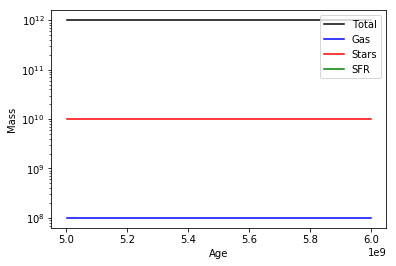

In [7]:
def integrate_time(galaxy, timestep, n_timesteps):
    """
    Integrate the time forward for a galaxy and record its state at each timestep; return as array
    """    
    data_arr = np.empty([5, n_timesteps])
    for i in range(n_timesteps):
        galaxy.evolve(timestep)
        data_arr[:,i] = galaxy.current_state()
    return data_arr

def plot_galaxy_evolution(data_arr):
    """
    Plot the evolution of a galaxy from its input data array
    """
    plt.clf()
    plt.semilogy(data[3], data[0], color='k', label='Total')
    plt.semilogy(data[3], data[1], color='b', label='Gas')
    plt.semilogy(data[3], data[2], color='r', label='Stars')
    plt.semilogy(data[3], data[4], color='g', label='SFR')
    plt.xlabel('Age')
    plt.ylabel('Mass')
    plt.legend(loc=1)
    plt.show()

milky_way = EvolvingGalaxy(1e12, 1e8, 1e10, age=5e9)
data = integrate_time(milky_way, 1e6, 1000)
plot_galaxy_evolution(data)

**Problem 2e**

How do galaxies evolve with time?  They do in lots of ways, but let's make a few specific rules.  

Galaxies tend to accrete gas from the intergalactic medium over time.  We'll modify the code from above for your `EvolvingGalaxy` class to include a `accrete_gas_from_IGM` method, which adds to the `cold_gas_mass` and `total_mass` of the galaxy with time.  Let's give it a random component too.

Galaxies form stars, converting `cold_gas_mass` to `stellar_mass` according to their star formation rate (`SFR`).  But there must be sufficient `cold_gas_mass` to consume, so make sure there is enough for the `SFR` to operate for the alloted `time`, otherwise the `SFR` should drop to 0.

Finally, we haven't actually calculated a `SFR`, let's just create a method, `calculate_star_formation_rate`, choose a random value every time it is called.  We'll also scale it in some way by the `total_mass` of the galaxy and use the Milky Way as a guide.  The Milky Way forms about 1 Msun/year and it has a `total_mass` of 1e12 Msun.  

Include these functions in our `evolve` method, and re-generate a galaxy evolution plot like you did in Problem 2d.  Since there is a random component, you can try re-running it a few times and see how the behavior changes.

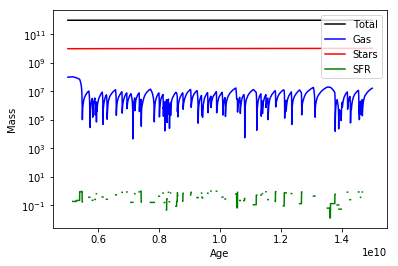

In [8]:
class EvolvingGalaxy(Galaxy):
    """
    Galaxy class for representing a galaxy that can evolve over time.
    """
    def current_state(self):
        """
        Return a tuple of the galaxy's total_mass, cold_gas_mass, stellar_mass, age, and SFR
        """
        return (self.total_mass, self.cold_gas_mass, self.stellar_mass, self.age, self.SFR)
    
    def calculate_star_formation_rate(self):
        """
        Calculate the star formation rate by taking a random number between 0 and 1 
        normalized by the galaxy total mass / 1e12; 
        
        Also updates the galaxy's color to blue if SFR > 0.01, otherwise color = red
        """
        self.SFR = random.random() * (self.total_mass / 1e12)
        if self.SFR > 0.01: 
            self.color = 'blue'
        else:
            self.color = 'red'
            
    def accrete_gas_from_IGM(self, time):
        """
        Allow the galaxy to accrete cold gas from the IGM at a variable rate normalized to
        the galaxy's mass
        """
        cold_gas_accreted = random.random() * 0.1 * time * (self.total_mass / 1e12)
        self.cold_gas_mass += cold_gas_accreted
        self.total_mass += cold_gas_accreted
        
    def form_stars(self, time):
        """
        Form stars according to the current star formation rate and time available
        If unable cold gas, then shut off star formation
        """
        if self.cold_gas_mass > self.SFR * time:
            self.cold_gas_mass -= self.SFR * time
            self.stellar_mass += self.SFR * time
        else:
            self.SFR = 0
            self.color = 'red'
            
    def evolve(self, time):
        """
        Evolve this galaxy forward for a period time
        """
        if random.random() < 0.01:
            self.calculate_star_formation_rate()
        self.accrete_gas_from_IGM(time)
        self.form_stars(time)
        self.age += time                
            
milky_way = EvolvingGalaxy(1e12, 1e8, 1e10, age=5e9)
data = integrate_time(milky_way, 1e6, 10000)
plot_galaxy_evolution(data)

**Problem 2f**

Based on your knowledge of how galaxies evolve, do these results make sense?  Discuss with your coding partner if so/not, and ways in which you might tweak it to work better.

*Possible Answers:* For the most part, yes.  The galaxy consumes its cold gas and creates stars, and when it runs out of gas, it shuts off star formation for a time.  But after time, it accretes enough cold gas to allow it to form stars again, so it's in sort of loop.  But it's not really realistic because it needs to interact with its environment and other galaxies through galaxy mergers, gas accretion, gas stripping, etc.

## Problem 3) Make a galaxy class that can interact with other galaxies (challenging!)

Most galaxies do not evolve in isolation, so let's make a galaxy class that enables galaxies to actually interact with each other.  We can re-use much of the code from our previous examples through inheritance!  Yeah!

**Problem 3a**

Let us create a new subclass of `EvolveGalaxy`, so that it inherits most of the traits of our previous work.  But we will add some new features including position and velocity values in the x-y plane, so that our galaxy can actually move over time.

Create a new class `MovingGalaxy` that is a subclass of `EvolveGalaxy`.  Make a new `__init__` method with all of the arguments from it's parent class `EvolveGalaxy`, but add the additional arguments of `x_position`, `y_position`, `x_velocity`, `y_velocity`, and `id_num`.  

*Note: all arguments must come before any keyword arguments, so the `age` kwarg has to come at the very end.*

Also, make a new `__repr__` method for this class that just includes it's `idnum`, `x_position`, and `y_position`.

To assure your code works, create an instance of a `MovingGalaxy`, and print it out.

In [9]:
class MovingGalaxy(EvolvingGalaxy):
    """
    Galaxy class that can evolve and move in the x,y plane
    """
    def __init__(self, total_mass, cold_gas_mass, stellar_mass, x_position, y_position, x_velocity, y_velocity, idnum, age=0):
        
        # Replace self with super to activate the superclass's methods
        super().__init__(total_mass, cold_gas_mass, stellar_mass)
        
        self.x_position = x_position
        self.y_position = y_position
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity
        self.idnum = idnum
        
    def __repr__(self):
        return "Galaxy %i (x = %.0f; y = %.0f)" % (self.idnum, self.x_position, self.y_position)

milky_way = MovingGalaxy(1e12, 1e8, 1e10, 0, 0, 0, 0, 0)
print(milky_way)

Galaxy 0 (x = 0; y = 0)


**Problem 3b**

In order for our `MovingGalaxy` to move, we have to give it a few more methods.  Copy your class definition from above, and add three more methods.  

Create a `move` method which accepts a `time` argument and updates the `MovingGalaxy`'s `x_position`, and `y_position` by accounting for the motion from its `x_velocity` and `y_velocity`.

Create a `calculate_momentum` method that returns a tuple of (x_momentum, y_momentum) for a galaxy.

Finally, create an `evolve` method, which accepts a `time` argument, and just executes your `move` method before calling the superclass's `evolve` method (i.e. `EvolvingGalaxy`'s).

In [10]:
class MovingGalaxy(EvolvingGalaxy):
    """
    This galaxy can move over time in the x,y plane
    """
    def __init__(self, total_mass, cold_gas_mass, stellar_mass, x_position, y_position, x_velocity, y_velocity, idnum, age=0):
        
        # Replace self with super to activate the superclass's methods
        super().__init__(total_mass, cold_gas_mass, stellar_mass)
        
        self.x_position = x_position
        self.y_position = y_position
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity
        self.idnum = idnum
        
    def __repr__(self):
        return "Galaxy %i (x = %.0f; y = %.0f)" % (self.idnum, self.x_position, self.y_position)
        
    def move(self, time):
        """
        """
        self.x_position += self.x_velocity * time
        self.y_position += self.y_velocity * time
        
    def calculate_momentum(self):
        return (self.total_mass * self.x_velocity, self.total_mass * self.y_velocity)

    def evolve(self, time):
        self.move(time)
        super().evolve(time)

**Problem 3c**

OK, so we have a `MovingGalaxy` that can move, but we need a Universe in which it can move!  

So let us create a new `Universe` class that can hold one or more galaxies.  We will give it x and y limits which define its borders to be 0 and 100, as well as an internal list to hold the galaxies themselves.  Make an `evolve` method for the `Universe` class that moves its time forward some timestep.  How does this affect the galaxies?  Are there boundaries to your `Universe`?  What happens when `MovingGalaxy`'s run into each other?  Don't worry about gravity for now, but you could make them merge when they are close enough to each other, or just let them fly through each other.  After all, it's your Universe.

It may also be useful to make a method to add a random `MovingGalaxy`, so that you can add several to your `Universe` during initialization.  Start out only adding a few, as it might get expensive!

Make a command that plots the positions of the galaxies with time using `matplotlib.scatter()`, and save the corresponding outputs to a files called `frame%04i.png`.  The next steps allow you to make a movie of these frames.

In [15]:
def distance(galaxy1, galaxy2):
    x_diff = galaxy1.x_position - galaxy2.x_position
    y_diff = galaxy1.y_position - galaxy2.y_position
    return (x_diff**2 + y_diff**2)**0.5

class Universe():
    """
    """
    def __init__(self):
        self.xrange = (0,100)
        self.yrange = (0,100)
        self.galaxies = []
        self.added_galaxies = []
        self.removed_galaxies = []
        self.time = 0
        pass
    
    def __repr__(self):
        out = 'Universe: t=%.2g\n' % self.time
        for galaxy in self.galaxies:
            out = "%s%s\n" % (out, galaxy)
        return out
        
    def add_galaxy(self, galaxy=None):
        if galaxy is None:
            stellar_mass = 10**(4*random.random()) * 1e6
            cold_gas_mass = 10**(4*random.random()) * 1e6
            total_mass = (cold_gas_mass + stellar_mass)*1e2
            galaxy = MovingGalaxy(total_mass,
                                  cold_gas_mass,
                                  stellar_mass,
                                  x_position=random.random()*100,
                                  y_position=random.random()*100,
                                  x_velocity=random.uniform(-1,1)*1e-7,
                                  y_velocity=random.uniform(-1,1)*1e-7,
                                  idnum=len(self.galaxies))
        self.galaxies.append(galaxy)
        
    def remove_galaxy(self, galaxy):
        if galaxy in self.galaxies:
            del self.galaxies[self.galaxies.index(galaxy)]
        
    def evolve(self, time):
        for galaxy in self.galaxies:
            galaxy.evolve(time)
            galaxy.x_position %= 100
            galaxy.y_position %= 100
        self.check_for_mergers()
        for galaxy in self.removed_galaxies:
            self.remove_galaxy(galaxy)
        for galaxy in self.added_galaxies:
            self.add_galaxy(galaxy)
        self.removed_galaxies = []
        self.added_galaxies = []
        self.time += time
            
    def merge_galaxies(self, galaxy1, galaxy2):
        print('Merging:\n%s\n%s' % (galaxy1, galaxy2))
        x_mom1, y_mom1 = galaxy1.calculate_momentum()
        x_mom2, y_mom2 = galaxy2.calculate_momentum()
        new_total_mass = galaxy1.total_mass + galaxy2.total_mass
        new_galaxy = MovingGalaxy(total_mass = new_total_mass,
                                  cold_gas_mass = galaxy1.cold_gas_mass + galaxy2.cold_gas_mass,
                                  stellar_mass = galaxy1.stellar_mass + galaxy2.stellar_mass,
                                  x_position = galaxy1.x_position,
                                  y_position = galaxy1.y_position,
                                  x_velocity = (x_mom1 + x_mom2) / new_total_mass,
                                  y_velocity = (y_mom1 + y_mom2) / new_total_mass,
                                  idnum = galaxy1.idnum)
        self.added_galaxies.append(new_galaxy)
        self.removed_galaxies.append(galaxy1)
        self.removed_galaxies.append(galaxy2)
        
    def check_for_mergers(self):
        for i, galaxy1 in enumerate(self.galaxies):
            for j, galaxy2 in enumerate(self.galaxies[i+1:]):
                if distance(galaxy1, galaxy2) <= 2:
                    self.merge_galaxies(galaxy1, galaxy2)
                
    def plot_state(self, frame_id):
        plt.clf()
        x = [galaxy.x_position for galaxy in self.galaxies]
        y = [galaxy.y_position for galaxy in self.galaxies]
        color = [galaxy.color for galaxy in self.galaxies]
        size = [galaxy.total_mass / 1e9 for galaxy in self.galaxies]
        plt.scatter(x,y, color=color, s=size)
        plt.xlim(uni.xrange)
        plt.ylim(uni.yrange)
        plt.savefig('frame%04i.png' % frame_id)


**Problem 3d**

Initialize a `Universe` with several galaxies in it. Run your `Universe` forward in time, and plot the resulting state of the `Universe` over time to files called `frame%04i.png`.

Merging:
Galaxy 11 (x = 35; y = 56)
Galaxy 24 (x = 34; y = 56)
Merging:
Galaxy 1 (x = 24; y = 2)
Galaxy 2 (x = 24; y = 0)
Merging:
Galaxy 6 (x = 77; y = 50)
Galaxy 17 (x = 75; y = 49)
Merging:
Galaxy 9 (x = 79; y = 74)
Galaxy 21 (x = 79; y = 74)
Merging:
Galaxy 5 (x = 4; y = 44)
Galaxy 14 (x = 4; y = 44)
Merging:
Galaxy 10 (x = 20; y = 33)
Galaxy 20 (x = 21; y = 33)
Merging:
Galaxy 22 (x = 82; y = 81)
Galaxy 9 (x = 82; y = 83)
Merging:
Galaxy 4 (x = 60; y = 44)
Galaxy 12 (x = 62; y = 44)
Merging:
Galaxy 15 (x = 65; y = 55)
Galaxy 19 (x = 64; y = 54)
Merging:
Galaxy 23 (x = 27; y = 34)
Galaxy 11 (x = 28; y = 34)
Merging:
Galaxy 7 (x = 85; y = 46)
Galaxy 6 (x = 87; y = 46)
Merging:
Galaxy 5 (x = 80; y = 12)
Galaxy 10 (x = 82; y = 12)
Merging:
Galaxy 13 (x = 63; y = 98)
Galaxy 5 (x = 63; y = 100)
Merging:
Galaxy 8 (x = 93; y = 88)
Galaxy 16 (x = 94; y = 87)


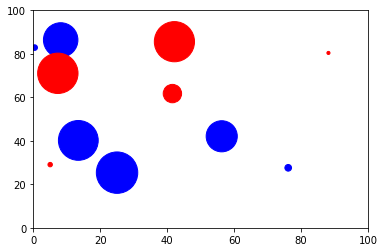

In [16]:
uni = Universe()
n_timesteps = 2e2
n_galaxies = 25
for i in range(n_galaxies):
    uni.add_galaxy()

for i in range(int(n_timesteps)):
    uni.evolve(2e9/n_timesteps)
    uni.plot_state(i)

**Problem 3e**

The command below will output a movie file called `movie.mp4` by combining all of your `frame%04i.png` files and packaging them together at a framerate of 20 FPS.  It requires ffmpeg to be installed, but you can do this easily if you have homebrew installed by running `brew install ffmpeg`.  There are other means to download `ffmpeg` online.  Otherwise, you can flip through the frames manually to see how the `Universe` changes with time.  

If you were able to execute this step OK, execute to the next two fields and watch your movie!  Again, since there is a random component to these models, you can try running it a few times to see how the results change.

In [17]:
%%bash
ffmpeg -r 20 -f image2 -i frame%04d.png -vcodec libx264 -pix_fmt yuv420p -crf 25 -y movie.mp4

ffmpeg version 3.0.2 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 7.3.0 (clang-703.0.29)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.0.2 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libxvid --enable-vda
  libavutil      55. 17.103 / 55. 17.103
  libavcodec     57. 24.102 / 57. 24.102
  libavformat    57. 25.100 / 57. 25.100
  libavdevice    57.  0.101 / 57.  0.101
  libavfilter     6. 31.100 /  6. 31.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  0.100 /  4.  0.100
  libswresample   2.  0.101 /  2.  0.101
  libpostproc    54.  0.100 / 54.  0.100
Input #0, image2, from 'frame%04d.png':
  Duration: 00:00:10.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 432x288 [SAR 2834:2834 DAR 3:2], 20 fps, 20 tbr, 20 tbn, 20 tbc
[libx264 @ 0x7fd17

In [18]:
%%HTML
<video width="1000" height="1000" controls>
  <source src="movie.mp4" type="video/mp4">
</video>

## Challenge Problem: Add in gravitational accelerations to your Universe

Using the framework you developed for Problems 1-3, add in gravitational effects to calculate the gravitational acceleration of each galaxy with each other galaxy.  This is what is known as an N-body integrator, and it can be surprisingly easy to write one.  Do this for your `Universe` above and run it forward in time.